# **Proyecto del Primer Parcial**

El tema del proyecto es sobre:

**Análisis Predictivo mediante el modelo de regresión lineal - regresión logística para evaluar el ROE/ROA en las empresas del Ecuador durante los años 2017-2020**

1. Los datos de los indicadores se bajan aquí. 
2. Crear el dataset con Pandas.
4. Tome como referencia los artículos adjuntos
5. Revisar el estado del arte y trabajos similares en: Google Scholar/Académico, DOAJ.org, Scopus, Science Direct, Web of Science.
6. Haga el análisis exploratorio correlacional en Python del año 2019
7. Crear el Modelo predictivo de regresión lineal ROE y regresión logística del ROA en pytorch.
8. Evaluar los dos modelos lineal y logístico con los años 2020, 2018 y 2017. Note que ya no debe entrenar, solo predecir con los modelos creados en el paso 7
9. Contestar las siguientes preguntas
>>
> - ¿Qué año predice mejor y peor? Crear una tabla para comparar los resultados
> - ¿Qué categoría de empresas predice mejor y peor? Crear una tabla para comparar los resultados.

Subir TODOS los datos, scripts y documento a la carpeta proyecto-1P . Subir los script e informes a esta tarea.

---
# **Grupo &#35; 2**

>**Tema:** - Análisis Predictivo mediante el modelo de regresión lineal - regresión logística para evaluar el ROE/ROA en las empresas del Ecuador durante los años 2017-2020
>
>**Integrantes:** 
> - Apolo Baldeon Erick Tomas
> - Mora Ferruzola Violeta Nicolle
> - Ronquillo Lamilla Cristian José
> - Tigreros Peña Dennys Ariel
> - Tola Molina Pedro Salvador

---

# **Información General**
**Análisis Predictivo mediante el modelo de regresión lineal - regresión logística para evaluar el ROE/ROA en las empresas del Ecuador durante los años 2017-2020**

**Sector:** Todos

**Descripción:** 

**Pregunta 1:** ¿Qué año predice mejor y peor los modelos creado?

**Pregunta 2:** ¿Qué categoría de empresas predice mejor y peor los modelos creados?

<center><img src="https://timo.vn/wp-content/uploads/roa-roe-la-gi.jpg"></center>

> **Fuente:** Datos extraidos de la Superintendencia de Bancos (SuperCIAS)
>
> **Datos Extraidos:** 
>  1. Indicadores Financieros (2017 - 2020)
>
>  - **Link:** [https://reporteria.supercias.gob.ec/portal/cgi-bin/](https://reporteria.supercias.gob.ec/portal/cgi-bin/cognos.cgi?b_action=cognosViewer&ui.action=run&ui.object=%2fcontent%2ffolder%5b%40name%3d%27Reportes%27%5d%2ffolder%5b%40name%3d%27Indicadores%27%5d%2freport%5b%40name%3d%27Indicadores%20Sector%20Empresa%27%5d&ui.name=Indicadores%20Sector%20Empresa&run.outputFormat=&run.prompt=true)
>
>  - **Ultima Actualización:** 07/01/2021 12:59:23
>
>  2. Directorio de empresas
>
>  - **Link:** [https://mercadodevalores.supercias.gob.ec/reportes/directorioCompanias.jsf](https://mercadodevalores.supercias.gob.ec/reportes/directorioCompanias.jsf)
>
>  - **Ultima Actualización:** 11/07/2022 04:45:31

## **Carga de Datos**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import glob
import os

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Inteligencia Artificial/Segundo Parcial/Proyecto/indicadores2019_cia.xlsx')
df.sample(5)

,AÑO,EXPEDIENTE,NOMBRE,RAMA,DESCRIPCIÓN RAMA,RAMA 6 DÍGITOS,SUBRAMA 2 DÍGITOS,LIQUIDEZ CORRIENTE,PRUEBA ÁCIDA,ENDEUDAMIENTO DEL ACTIVO,...,IMPACTO DE LA CARGA FINANCIERA,RENTABILIDAD NETA DEL ACTIVO,MARGEN BRUTO,MARGEN OPERACIONAL,RENTABILIDAD NETA DE VENTAS,RENTABILIDAD OPERACIONAL DEL PATRIMONIO,RENTABLIDAD FINANCIERA,UTILIDAD OPERACIONAL/TOTAL DE ACTIVOS,ROE,ROA
19844,2019,98447,CONSTRUCTORA VASCO CEDEÃ‘O CIA. LTDA.,L,ACTIVIDADES INMOBILIARIAS.,L6810.01,L68,1.296496,1.296496,0.772892,...,0.019717,0.047781,0.587745,0.096443,0.048272,0.420335,0.210391,0.095462,0.210391,0.047781
43041,2019,165674,LIDERDIGITALSA S.A.,G,COMERCIO AL POR MAYOR Y AL POR MENOR REPARACIÃ...,G4649.11,G46,NaN,NaN,0.000000,...,0.000000,-1.121733,1.000000,-0.178789,-0.178789,-1.121733,-1.121733,-1.121733,-1.121733,-1.121733
84929,2019,726327,CONSTRUCTORA VEKALIT CIA.LTDA.,F,CONSTRUCCIÃ“N.,F4100.10,F41,NaN,NaN,0.000000,...,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,-0.025875,-0.025875
61971,2019,312148,LIVE MEETING ROOM LIVEMEETINGROOM CIA.LTDA.,N,ACTIVIDADES DE SERVICIOS ADMINISTRATIVOS Y DE ...,N7912.00,N79,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67279,2019,702298,CONSTRUCTORA TECNICA ECUATORIANA S.A. CONSTRUT...,F,CONSTRUCCIÃ“N.,F4210.11,F42,1.373025,0.092649,0.728319,...,0.000000,-0.909931,-2.425073,-3.213410,-3.213390,-3.349281,-3.349260,-0.909936,-3.349260,-0.909931


## **Limpieza de Datos**

In [ ]:
print("Las dimensiones del DataFrame son: {}".format(df.shape))

Las dimensiones del DataFrame son: (85793, 37)


In [ ]:
df = df.dropna(thresh=37)
df.sample(5)

,AÑO,EXPEDIENTE,NOMBRE,RAMA,DESCRIPCIÓN RAMA,RAMA 6 DÍGITOS,SUBRAMA 2 DÍGITOS,LIQUIDEZ CORRIENTE,PRUEBA ÁCIDA,ENDEUDAMIENTO DEL ACTIVO,...,IMPACTO DE LA CARGA FINANCIERA,RENTABILIDAD NETA DEL ACTIVO,MARGEN BRUTO,MARGEN OPERACIONAL,RENTABILIDAD NETA DE VENTAS,RENTABILIDAD OPERACIONAL DEL PATRIMONIO,RENTABLIDAD FINANCIERA,UTILIDAD OPERACIONAL/TOTAL DE ACTIVOS,ROE,ROA
37767,2019,152068,COPINTERLLANTA S.A.,G,COMERCIO AL POR MAYOR Y AL POR MENOR REPARACIÃ...,G4530.00,G45,1.170117,0.424766,0.886870,...,0.028449,0.012586,0.267611,0.046425,0.012216,0.422815,0.111255,0.047833,0.111255,0.012586
7585,2019,41204,PISCICOLA MALECON SA MALSA,A,"AGRICULTURA, GANADERÃA, SILVICULTURA Y PESCA.",A0321.02,A03,2.578876,1.706575,0.217874,...,0.000278,0.053247,0.516998,0.380654,0.041865,0.619013,0.068080,0.484146,0.068080,0.053247
1983,2019,11979,"AGROPESA, INDUSTRIA AGROPECUARIA ECUATORIANA SA",C,INDUSTRIAS MANUFACTURERAS.,C1010.11,C10,2.147667,2.147667,0.220745,...,0.000812,0.139071,0.684778,0.589951,0.148976,0.706738,0.178467,0.550729,0.178467,0.139071
33613,2019,143294,SUMIPERNOS CIA. LTDA.,C,INDUSTRIAS MANUFACTURERAS.,C2599.15,C25,1.476835,0.532373,0.845633,...,0.049853,0.019005,0.574094,0.054174,0.024479,0.272473,0.123118,0.042061,0.123118,0.019005
29223,2019,133500,BLOOD CENTER S.A.,Q,ACTIVIDADES DE ATENCIÃ“N DE LA SALUD HUMANA Y ...,Q8690.92,Q86,1.623980,1.453706,0.552734,...,0.004206,0.000630,0.442514,0.017979,0.000425,0.059568,0.001409,0.026643,0.001409,0.000630


In [ ]:
df.isnull().any()

AÑO                                        False
EXPEDIENTE                                 False
NOMBRE                                     False
RAMA                                       False
DESCRIPCIÓN RAMA                           False
RAMA 6 DÍGITOS                             False
SUBRAMA 2 DÍGITOS                          False
LIQUIDEZ CORRIENTE                         False
PRUEBA ÁCIDA                               False
ENDEUDAMIENTO DEL ACTIVO                   False
ENDEUDAMIENTO PATRIMONIAL                  False
ENDEUDAMIENTO A CORTO PLAZO                False
ENDEUDAMIENTO A LARGO PLAZO                False
COBERTURA DE INTERESES                     False
ENDEUDAMIENTO DEL ACTIVO FIJO              False
APALANCAMIENTO                             False
APALANCAMIENTO FINANCIERO                  False
FORTALEZA PATRIMONIAL                      False
ENDEUDAMIENTO PATRIMONIAL CORRIENTE        False
ENDEUDAMIENTO PATRIMONIAL NO CORRIENTE     False
APALANCAMIENTO A COR

## **Pre-Procesamiento**

### **Remover Outliers**

In [ ]:
# Eliminar las filas con valores atípicos
df = df[(df['ROE']>-1) & (df['ROE']<1) &(df['ROA']>-1) & (df['ROA']<1) & (df['ENDEUDAMIENTO DEL ACTIVO']<6) & (df['RENTABILIDAD NETA DE VENTAS']>-50) & 
        (df['UTILIDAD OPERACIONAL/TOTAL DE ACTIVOS ']>-5) & (df['UTILIDAD OPERACIONAL/TOTAL DE ACTIVOS ']<5) & (df['RENTABLIDAD FINANCIERA']<500)]

### **Categorizar Variable ROA**

In [ ]:
df['ROA_DIS'] = pd.qcut(df['ROA'], 3, labels=False)
df['ROA_DIS'].sample(10)

22400    2
13598    2
72351    1
14597    0
12       1
16428    1
19201    1
21187    0
32214    2
41831    2
Name: ROA_DIS, dtype: int64

### **Reenombrar etiquetas de RAMA**

In [ ]:
desc = ['COMERCIO AL POR MAYOR Y AL POR MENOR REPARACIÃ“N DE VEHÃCULOS AUTOMOTORES Y MOTOCICLETAS.', 'INDUSTRIAS MANUFACTURERAS.', 'AGRICULTURA, GANADERÃA,  SILVICULTURA Y PESCA.', 'CONSTRUCCIÃ“N.',
       'ACTIVIDADES PROFESIONALES, CIENTÃFICAS Y TÃ‰CNICAS.', 'ACTIVIDADES DE ALOJAMIENTO Y DE SERVICIO DE COMIDAS.','INFORMACIÃ“N Y COMUNICACIÃ“N.','ACTIVIDADES DE SERVICIOS ADMINISTRATIVOS Y DE APOYO.',
       'ACTIVIDADES DE ATENCIÃ“N DE LA SALUD HUMANA Y DE ASISTENCIA SOCIAL.','TRANSPORTE Y ALMACENAMIENTO.', 'ACTIVIDADES INMOBILIARIAS.', 'EXPLOTACIÃ“N DE MINAS Y CANTERAS.', 'OTRAS ACTIVIDADES DE SERVICIOS.',
       'DISTRIBUCIÃ“N DE AGUA ALCANTARILLADO, GESTIÃ“N DE DESECHOS Y ACTIVIDADES DE SANEAMIENTO.','SUMINISTRO DE ELECTRICIDAD, GAS, VAPOR Y AIRE ACONDICIONADO.',
       'ARTES, ENTRETENIMIENTO Y RECREACIÃ“N.', 'ENSEÃ‘ANZA.', 'ACTIVIDADES FINANCIERAS Y DE SEGUROS.','ACTIVIDADES DE ORGANIZACIONES Y Ã“RGANOS EXTRATERRITORIALES.']

In [ ]:
desc_good = ["COMERCIO AL POR MAYOR Y AL POR MENOR REPARACIÓN DE VEHÍCULOS AUTOMOTORES Y MOTOCICLETAS.", "INDUSTRIAS MANUFACTURERAS.","AGRICULTURA, GANADERÍA, SILVICULTURA Y PESCA.", "CONSTRUCCIÓN.", 
 "ACTIVIDADES PROFESIONALES, CIENTÍFICAS Y TÉCNICAS.","ACTIVIDADES DE ALOJAMIENTO Y DE SERVICIO DE COMIDAS.", "INFORMACIÓN Y COMUNICACIÓN.", "ACTIVIDADES DE SERVICIOS ADMINISTRATIVOS Y DE APOYO.",
"ACTIVIDADES DE ATENCIÓN DE LA SALUD HUMANA Y DE ASISTENCIA SOCIAL.", "TRANSPORTE Y ALMACENAMIENTO.", "ACTIVIDADES INMOBILIARIAS.", "EXPLOTACIÓN DE MINAS Y CANTERAS.",
"OTRAS ACTIVIDADES DE SERVICIOS.", "DISTRIBUCIÓN DE AGUA ALCANTARILLADO, GESTIÓN DE DESECHOS Y ACTIVIDADES DE SANEAMIENTO.","SUMINISTRO DE ELECTRICIDAD, GAS, VAPOR Y AIRE ACONDICIONADO.", 
 "ARTES, ENTRETENIMIENTO Y RECREACIÓN.", "ENSEÑANZA.", "ACTIVIDADES FINANCIERAS Y DE SEGUROS.","ACTIVIDADES DE ORGANIZACIONES Y ÓRGANOS EXTRATERRITORIALES."]

In [ ]:
df['DESCRIPCIÓN RAMA'].replace(desc, desc_good, inplace=True)

## **Análisis Exploratorio de Datos**

In [ ]:
print("Skewness: {}".format(df['ROE'].skew()))
print("Kurtosis: {}".format(df['ROE'].kurt()))
print("--------------------------------------")
print(df['ROE'].describe())
print("--------------------------------------")

Skewness: 0.2009908413692949
Kurtosis: 2.83679171801059
--------------------------------------
count    13306.000000
mean         0.118738
std          0.276325
min         -0.999867
25%          0.006310
50%          0.069845
75%          0.211157
max          0.999334
Name: ROE, dtype: float64
--------------------------------------


In [ ]:
print("Skewness: {}".format(df['ROA'].skew()))
print("Kurtosis: {}".format(df['ROA'].kurt()))
print("--------------------------------------")
print(df['ROA'].describe())
print("--------------------------------------")

Skewness: -0.5395060112246742
Kurtosis: 18.04272956899672
--------------------------------------
count    13306.000000
mean         0.032126
std          0.096310
min         -0.972857
25%          0.001622
50%          0.018347
75%          0.056155
max          0.897318
Name: ROA, dtype: float64
--------------------------------------


**Analisis de los targets o "y" de entrenamiento: ROE - ROA**

- **ROA:** Skewness tiene un valor de -0.5395060112246742, lo que indica que la distribución de los datos tiene una cola ligeramente hacia la izquierda, es decir, tiene una mayor probabilidad de tener valores más bajos que la media. Kurtosis tiene un valor de 18.04272956899672, lo que indica que la distribución de los datos tiene colas más pronunciadas que una distribución normal.
- **ROE:** Skewness tiene un valor de 0.2009908413692949, lo que indica que la distribución de los datos tiene una cola ligeramente hacia la derecha, es decir, tiene una mayor probabilidad de tener valores más altos que la media. Kurtosis tiene un valor de 2.83679171801059, lo que indica que la distribución de los datos tiene colas menos pronunciadas que una distribución normal.

### **Análisis Univariado**

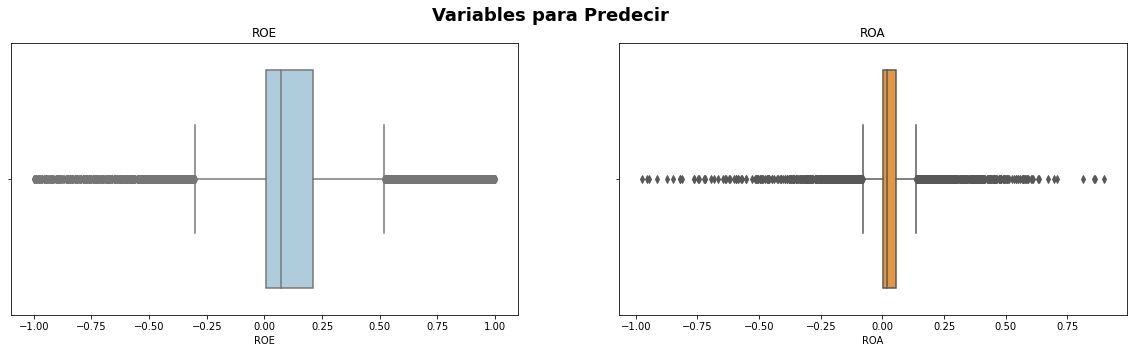

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,5))

sns.boxplot(x = df['ROE'], ax=ax1, palette="Paired")
sns.boxplot(x =  df['ROA'],ax=ax2, palette="YlOrBr")

fig.suptitle("Variables para Predecir", fontsize=18, fontweight='bold')
ax1.set_title("ROE")
ax2.set_title("ROA")
plt.show()

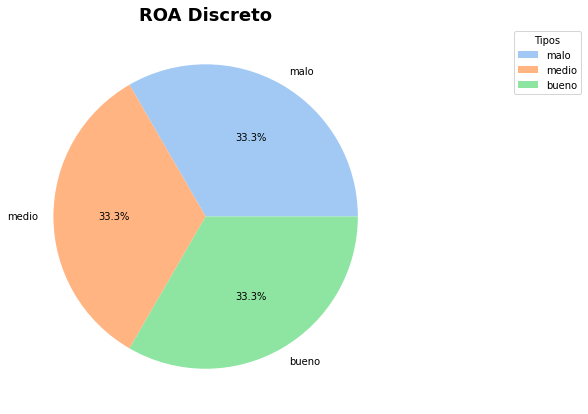

In [ ]:
plt.figure(figsize=(7,7))
plt.pie(df['ROA_DIS'].value_counts(), autopct='%1.1f%%', colors=sns.color_palette('pastel'), 
        labels=['malo', 'medio','bueno'])
plt.title('ROA Discreto', fontsize=18, fontweight='bold')
plt.legend(title ="Tipos",
          bbox_to_anchor =(1, 0, 0.5, 1))
plt.show()

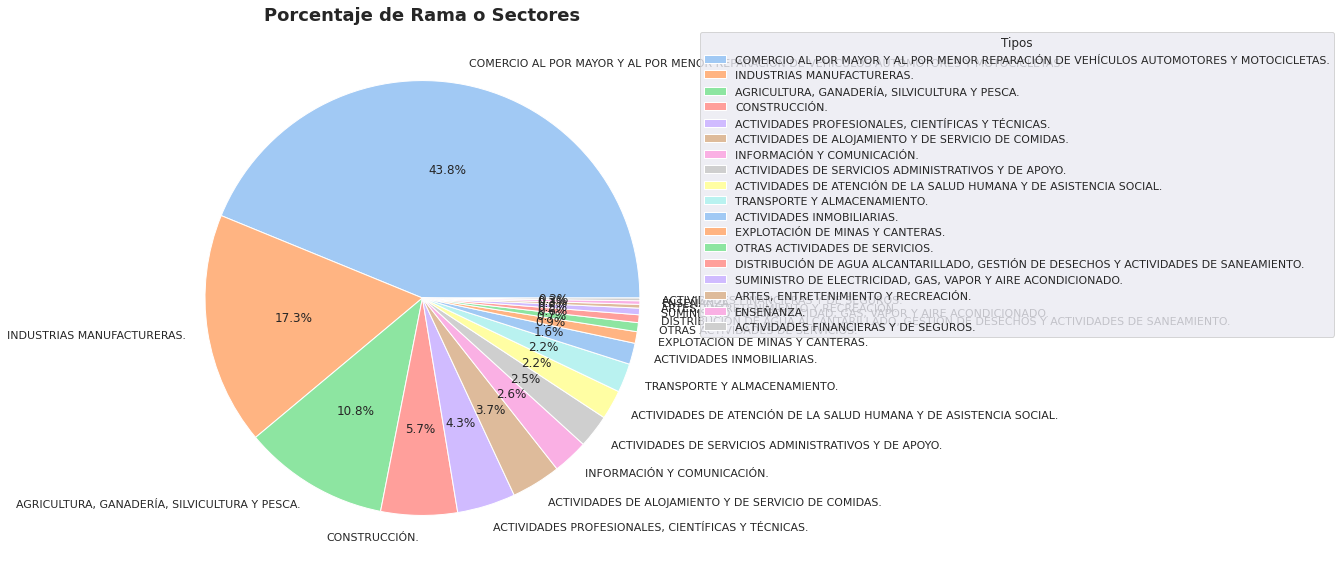

In [ ]:
sns.set(rc={'figure.figsize':(10,10)})
plt.pie(df['RAMA'].value_counts(), autopct='%1.1f%%', colors=sns.color_palette('pastel'), labels=df['DESCRIPCIÓN RAMA'].value_counts().index)
plt.title('Porcentaje de Rama o Sectores', fontsize=18, fontweight='bold')
plt.legend(title ="Tipos",
          bbox_to_anchor =(1, 0, 0.5, 1))
plt.show()

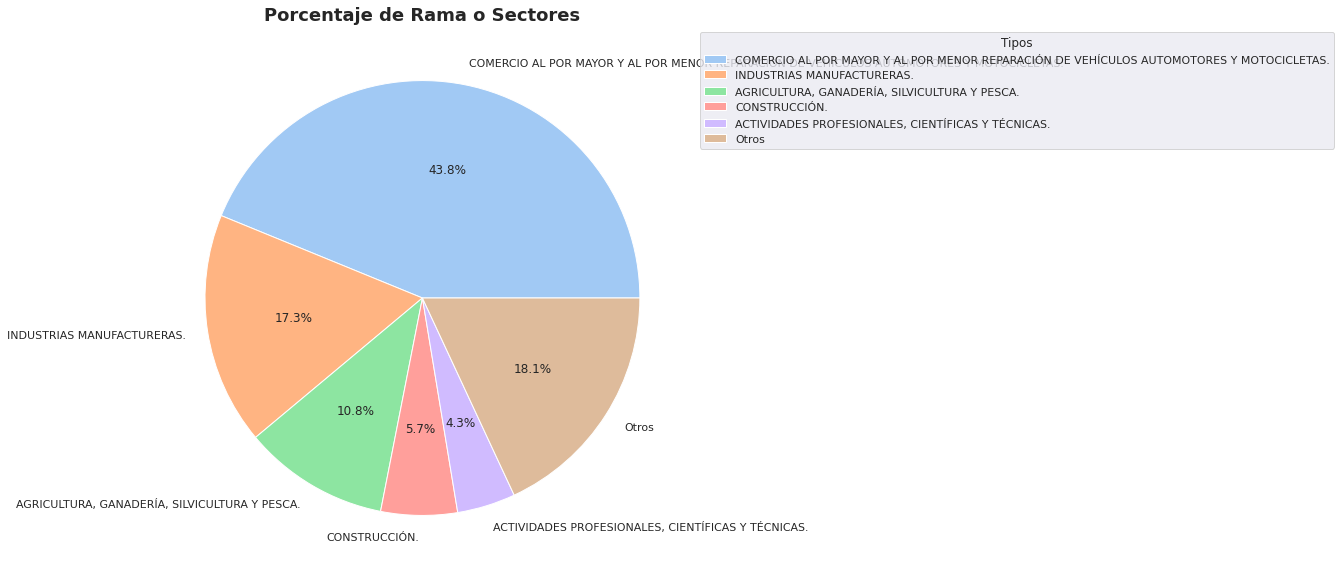

In [ ]:
ramas_count = df['DESCRIPCIÓN RAMA'].value_counts().sort_values(ascending=False)

# Obtener las 5 primeras categorías con mayor registro
top_ramas = ramas_count[:5].index

# Crear una nueva serie de datos donde las categorías no incluidas en las 5 primeras se agrupen bajo la categoría 'Otros'
ramas_new = df['DESCRIPCIÓN RAMA'].apply(lambda x: x if x in top_ramas else 'Otros')
ramas_new_count = ramas_new.value_counts()

# Construir una serie de valores a mano que incluya la categoría "Otros" al final
ramas_dict = dict(ramas_new_count[top_ramas])
ramas_dict['Otros'] = ramas_new_count['Otros']
ramas_new_count = pd.Series(ramas_dict)

# Graficar la nueva serie de datos
plt.pie(ramas_new_count, autopct='%1.1f%%', colors=sns.color_palette('pastel'), labels=ramas_new_count.index)
plt.title('Porcentaje de Rama o Sectores', fontsize=18, fontweight='bold')
plt.legend(title ="Tipos",
          bbox_to_anchor =(1, 0, 0.5, 1))
plt.show()

**Analisis de variables "y" - ROE y ROA**

- **ROE:** Comprende desde -1 al 1, como punto minimo se tiene -0.30 y punto máximo de 0.55. Con un promedio de datos de 0.11
- **ROA:** De la misma manera se tiene como punto minimo y máximo, -1 y 1 respectivamente, dando como promedio 0.03

**ROA Categorizado**
- Para la regresión lógisticas se toma el ROA, como es una variable continua se lo categoriza en 3 categorias y se distribuye de la siguiente manera:
  - **ROA BUENO:** 33.33% del total
  - **ROA MEDIO:** 33.33% del total
  - **ROA MALO:** 33.33% del total

**ROE Continuo** 
- Para la regresión lineal se toma el ROE es por eso que no se lo categoriza como el ROA, en la regresión lineal se da con variables continuas

**Porcentaje de Categorias por RAMA**
- Existen 18 categorias que se cuentan para el siguiente analisis de regresión de los cuales los 3 primeros y los 3 ultimos son:

  **3 Con mayor Registros**
  - Comercio al por mayor y al por menor, reparación de Vehiculos y automotores y vehiculos
  - Industrias Manufactureras
  - Agricultura, ganaderia, silvicultura y pesca

  **3 Con menor Registros**
  - Artes, entretenimiento y recreación
  - Enseñanza
  -Actividades financieras y de seguros

### **Análisis Bivariado**

Text(0.5, 1.0, 'Mapa de Calor\nCorrelación - Indicadores y ROE')

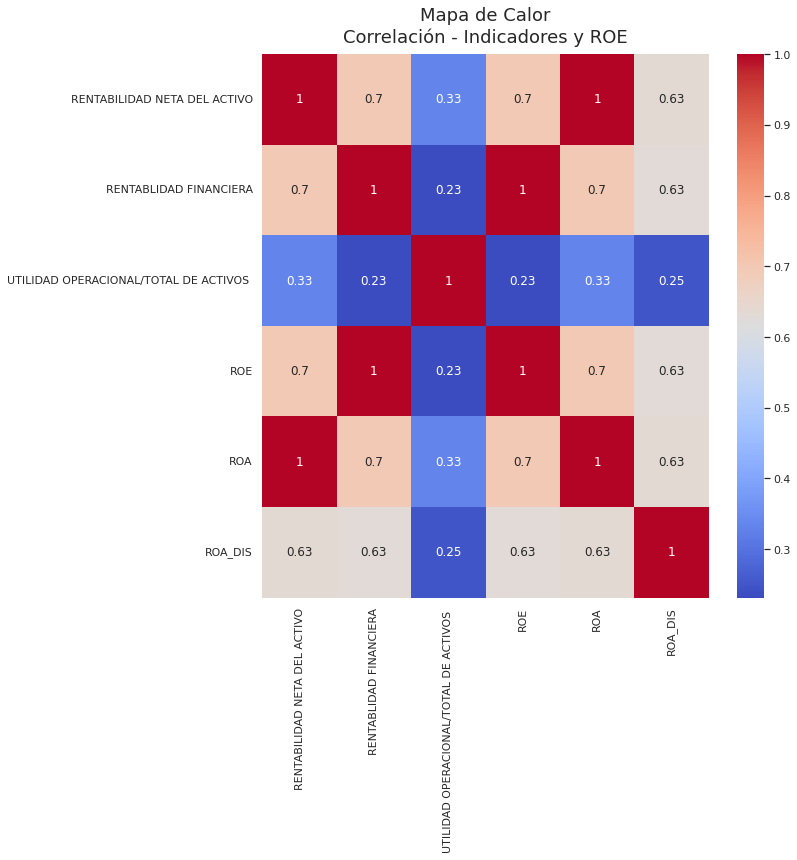

In [ ]:
corr_matrix = df.corr()
top_corr_features = corr_matrix.index[abs(corr_matrix["ROE"])>0.2]
plt.figure(figsize=(10,10))
hm = sns.heatmap(df[top_corr_features].corr(),
                annot=True,
                cmap="coolwarm")
hm.set_title('Mapa de Calor\nCorrelación - Indicadores y ROE', fontdict={'fontsize':18}, pad=12)

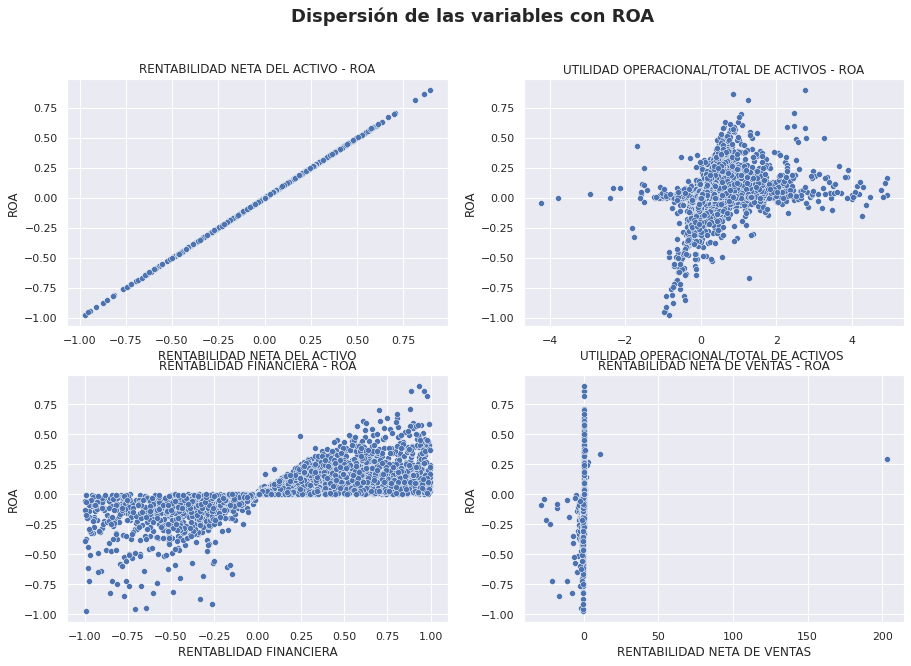

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(15,10))

sns.scatterplot(x = df['RENTABILIDAD NETA DEL ACTIVO'],y = df['ROA'], ax=ax1)
sns.scatterplot(x = df['UTILIDAD OPERACIONAL/TOTAL DE ACTIVOS '],y = df['ROA'], ax=ax2)
sns.scatterplot(x = df['RENTABLIDAD FINANCIERA'],y = df['ROA'], ax=ax3)
sns.scatterplot(x = df['RENTABILIDAD NETA DE VENTAS'],y = df['ROA'], ax=ax4)

fig.suptitle("Dispersión de las variables con ROA", fontsize=18, fontweight='bold')
ax1.set_title("RENTABILIDAD NETA DEL ACTIVO - ROA")
ax2.set_title("UTILIDAD OPERACIONAL/TOTAL DE ACTIVOS - ROA")
ax3.set_title("RENTABLIDAD FINANCIERA - ROA")
ax4.set_title("RENTABILIDAD NETA DE VENTAS - ROA")
plt.show()

**Analisis Bivariado:**
 - **Analisis Correlacional** 
 
 Para el ROA se pretende determinar las variables que más se ajusten en la relación con el ROA es por eso que se tiene en cuenta el analisis Correlacional para dicha determinación de Variables, entre ellas tenemos: 
  - RENTABILIDAD NETA DEL ACTIVO: 0.58 Con correlación positiva moderada
  - RENTABILIDAD NETA DE VENTAS: 0.11 Con correlación positiva debil
  - UTILIDAD OPERACIONAL/TOTAL DE ACTIVOS: 0.47 se tiene una correlación positiva moderada
  - ROTACION DE VENTAS: 0.14, siguiendo en la tendencia de correlación positiva pero este caso es debil

 - Otras variables estan:
  - ENDEUDAMIENTO
  - ENDEUDAMIENTO A CORTO PLAZO
  - ENDEUDAMIENTO A LARGO PLAZO
  - RENTABILIDAD FINANCIERA
  - ROE

<center> <img src='https://www.researchgate.net/profile/Juan-Cuellar-8/publication/330448962/figure/fig2/AS:715528805048323@1547606769941/Figura-23-Interpretacion-de-los-valores-que-entrega-el-coeficiente-de-correlacion-de.ppm'></img> </center> 

## **Selección de Variables** 

In [ ]:
X_fs = df.iloc[:, 7:35]
y_fs = df['ROA_DIS']

Numero Optimo de features : 2
Mejores features : ['RENTABILIDAD NETA DEL ACTIVO', 'RENTABILIDAD NETA DE VENTAS']


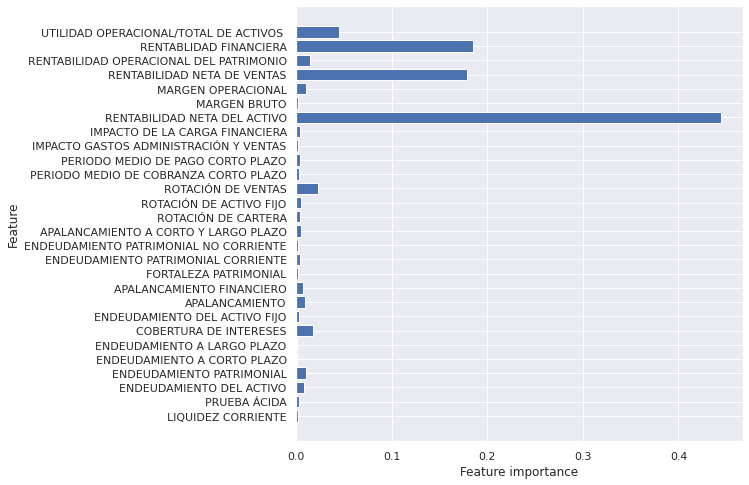

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
cv_estimator = RandomForestClassifier(random_state =42)
X_train,X_test,Y_train,Y_test = train_test_split(X_fs, y_fs, test_size=0.3, random_state=42)
cv_estimator.fit(X_train, Y_train)
cv_selector = RFECV(cv_estimator,cv= 5, step=1,scoring='accuracy')
cv_selector = cv_selector.fit(X_train, Y_train)
rfecv_mask = cv_selector.get_support()
rfecv_features = [] 
for bool, feature in zip(rfecv_mask, X_train.columns):
 if bool:
  rfecv_features.append(feature)
print('Numero Optimo de features :', cv_selector.n_features_)
print('Mejores features :', rfecv_features)
n_features = X_train.shape[1]
plt.figure(figsize=(8,8))
plt.barh(range(n_features), cv_estimator.feature_importances_, align='center') 
plt.yticks(np.arange(n_features), X_train.columns.values) 
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.show()

**Feature Selection**

- Para las selección de variables se toma en solo 4 variables para cada regresión tanto lineal como lógistica para responder lo que se quiere responder
  - **Regresión Lineal** 

    Se establece mediante el mapa de correlacion las siguientes variables:
      - 'RENTABILIDAD OPERACIONAL DEL PATRIMONIO'
      - 'ENDEUDAMIENTO PATRIMONIAL'
      - 'APALANCAMIENTO' 
      - 'FORTALEZA PATRIMONIAL'

  - **Regresión Logistica** 

    Se establece mediante un Featuring Selections las siguientes variables:
      - 'RENTABILIDAD NETA DEL ACTIVO' 
      - 'UTILIDAD OPERACIONAL/TOTAL DE ACTIVOS '
      - 'RENTABLIDAD FINANCIERA' 
      - 'RENTABILIDAD NETA DE VENTAS'

## **Modelo Predictivo**

<center><img src="https://www.statdeveloper.com/wp-content/uploads/2020/02/regresion-lineal-vs-regresion-logistica.png"></center>

### **Modelo predictivo de regresión lineal ROE**

In [ ]:
# Crear los arreglos con los inputs escogidos y el target del ROE
inputs_rl = df[['RENTABILIDAD OPERACIONAL DEL PATRIMONIO', 'ENDEUDAMIENTO PATRIMONIAL', 'APALANCAMIENTO', 'FORTALEZA PATRIMONIAL']].values
targets_rl = df[['ROE']].values
print('Input #1: ', inputs_rl[1], ' - Tamaño: ', inputs_rl.shape,
      '\nTarget #1: ', targets_rl[1], ' - Tamaño: ', targets_rl.shape)

Input #1:  [-0.09170358  1.7872771   2.787277    1.0029293 ]  - Tamaño:  (13306, 4) 
Target #1:  [-0.04617106]  - Tamaño:  (13306, 1)


In [ ]:
# Normalizar los inputs
from sklearn.preprocessing import StandardScaler
from torch.utils.data import TensorDataset, DataLoader
scaler = StandardScaler()
inputs = scaler.fit_transform(inputs_rl)

In [ ]:
# Cambiar el tipo de dato y crear tensores
X = torch.from_numpy(inputs_rl.astype(np.float32))
Y = torch.from_numpy(targets_rl.astype(np.float32))
n_samples, n_features = X.shape
print(n_samples, n_features)

13306 4


In [ ]:
# Crear conjuntos de datos de PyTorch a partir de los tensores
dataset_train = TensorDataset(X, Y)
dataset_train[1:2]

(tensor([[-0.0917,  1.7873,  2.7873,  1.0029]]), tensor([[-0.0462]]))

In [ ]:
# Crear dataloaders para cargar los datos en lotes durante el entrenamiento
bs=32
train_loader = DataLoader(dataset_train,batch_size=bs,shuffle=True)

In [ ]:
# Define la clase del modelo de regresión lineal
class ModeloRegresionLineal(torch.nn.Module):
  def __init__(self):
    super(ModeloRegresionLineal, self).__init__()
    self.linear = torch.nn.Linear(n_features, 1)

  def forward(self, x):
    y_pred = self.linear(x)
    return y_pred

In [ ]:
# Define los epochs, learning rate, función de costo y el optimizador
epochs = 30
ta = 1e-5  #learning rate
model_rl = ModeloRegresionLineal()
funcion_costo = torch.nn.L1Loss()
optimizer = torch.optim.SGD(model_rl.parameters(), lr = ta) #gradiente descendente, actualiza los pesos w y el bias b del modelo
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min')

for i in range(epochs):
  for x,y in train_loader:
    preds = model_rl(x)
    loss = funcion_costo(preds, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
  print(f"Epoch {i}/{epochs}: Loss {loss}")

Epoch 0/30: Loss 1.6234606504440308
Epoch 1/30: Loss 0.9141855239868164
Epoch 2/30: Loss 1.2749252319335938
Epoch 3/30: Loss 0.7749741077423096
Epoch 4/30: Loss 0.2445244938135147
Epoch 5/30: Loss 0.441709965467453
Epoch 6/30: Loss 0.4049699604511261
Epoch 7/30: Loss 0.280168741941452
Epoch 8/30: Loss 0.1219644621014595
Epoch 9/30: Loss 0.2796858847141266
Epoch 10/30: Loss 0.4026303291320801
Epoch 11/30: Loss 0.5637390613555908
Epoch 12/30: Loss 0.48046213388442993
Epoch 13/30: Loss 0.34336259961128235
Epoch 14/30: Loss 0.9243082404136658
Epoch 15/30: Loss 0.3707173466682434
Epoch 16/30: Loss 0.7240780591964722
Epoch 17/30: Loss 0.19674958288669586
Epoch 18/30: Loss 0.31669825315475464
Epoch 19/30: Loss 0.22701109945774078
Epoch 20/30: Loss 0.3212183713912964
Epoch 21/30: Loss 0.28736066818237305
Epoch 22/30: Loss 0.29900386929512024
Epoch 23/30: Loss 0.3335604667663574
Epoch 24/30: Loss 0.7895285487174988
Epoch 25/30: Loss 1.0008621215820312
Epoch 26/30: Loss 0.2068079113960266
Epoch 

In [ ]:
print('Weight:{} '.format(model_rl.linear.weight.detach().numpy()),
      '\nBias:{} '.format(model_rl.linear.bias.detach().numpy()))

Weight:[[ 0.15742017 -0.24593197  0.2447514  -0.43691036]]  
Bias:[-0.16566308] 


**Modelo predictivo de regresión lineal ROE**

- El modelo se define en la clase ModeloRegresionLineal, que hereda de la clase torch.nn.Module de PyTorch. El modelo tiene una sola capa, llamada "linear", que es una capa lineal que se utiliza para realizar una operación de multiplicación matricial (X @ w.t() + b) entre los datos de entrada (X) y los pesos (w) del modelo, más un sesgo (b).

- El modelo se entrena utilizando el método de optimización de gradiente descendente estocástico (SGD), con un learning rate de 1e-5, y se utiliza la función de costo de pérdida cuadrática media (MSELoss) para evaluar el rendimiento del modelo en cada iteración del entrenamiento. El modelo se entrena durante 30 épocas, y en cada época se actualizan los pesos y el sesgo del modelo mediante el optimizador SGD.

- También se utiliza un scheduler para reducir el learning rate del optimizador cuando la función de costo no se ha reducido durante varias iteraciones.

**Función Lineal Final**

$ y = (0.00375612 * x1) + (- 0.18859579 * x2) + (0.18879108 * x3) + (- 0.2053995 * x4) - 0.07093453 $



### **Modelo predictivo de regresión logística del ROA**

In [ ]:
# Crear los arreglos con los inputs escogidos y el target del ROA
inputs_rlg = df[['RENTABILIDAD NETA DEL ACTIVO',  'UTILIDAD OPERACIONAL/TOTAL DE ACTIVOS ', 'RENTABLIDAD FINANCIERA', 'RENTABILIDAD NETA DE VENTAS']].values
targets_rlg = df['ROA_DIS'].values
print('Input #1: ', inputs_rlg[1], ' - Tamaño: ', inputs_rlg.shape,
      '\nTarget #1: ', targets_rlg[1], ' - Tamaño: ', targets_rlg.shape)

Input #1:  [-0.01656493 -0.03290078 -0.04617107 -0.01552408]  - Tamaño:  (13306, 4) 
Target #1:  0  - Tamaño:  (13306,)


In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(inputs_rlg)

In [ ]:
x_train = torch.from_numpy(x_train.astype(np.float32))
y_train = torch.from_numpy(targets_rlg.astype(np.int64))

In [ ]:
class MulticlassLogisticRegression(torch.nn.Module):
  def __init__(self, n_features, n_classes):
    super(MulticlassLogisticRegression,self).__init__()
    self.linear = torch.nn.Linear(n_features, n_classes)
    self.softmax = torch.nn.Softmax(dim=1)

  def forward(self, x):
    y_hat = self.softmax(self.linear(x)) 
    return y_hat

#función que visualiza la evolución de la perdida y la precisión en cada epoch
def plot_loss(epochs, loss, acc):
  plt.figure(figsize=(10, 5))
  xlim = len(loss)
  plt.plot(epochs,loss)
  plt.plot(epochs,acc)
  plt.xlabel('Epochs')
  plt.ylabel('Value')
  plt.legend(('Train loss','Accuracy'),loc='upper right',shadow=True)
  plt.title('Train Loss vs Accuracy')

#función que realiza el entrenamiento
def train(num_epochs, optimizer, cost, model):
  #listas usadas para guardar los valores de pérdida, precisión, para cada epoch
  #esta información sirve para graficar el proceso de entrenamiento
  loss_vals = []
  acc_vals = []
  epoch_vals = []
  
  #entrenamiento
  for epoch in range(num_epochs):
    y_hat = model(x_train)
    loss = cost(y_hat,y_train)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    #se evalua cada 5 epochs
    if (epoch+1)%5 == 0:
      with torch.no_grad():
        loss_vals.append(loss.item())
        y_hat_class = y_hat.argmax(dim=1)
        accuracy = (y_hat_class.eq(y_train).sum())/float(y_hat.shape[0])
        acc_vals.append(accuracy.item())
        epoch_vals.append(epoch+1)
      print(f'epoch:{epoch+1} loss={loss.item()} accuracy={accuracy.item()}')
        
  #se grafica el proceso de entrenamiento
  plot_loss(epoch_vals, loss_vals, acc_vals)

epoch:5 loss=0.9655480980873108 accuracy=0.5955959558486938
epoch:10 loss=0.9146995544433594 accuracy=0.6346760988235474
epoch:15 loss=0.8797186613082886 accuracy=0.7084022164344788
epoch:20 loss=0.8534622192382812 accuracy=0.751315176486969
epoch:25 loss=0.8318100571632385 accuracy=0.7979106903076172
epoch:30 loss=0.8136485815048218 accuracy=0.8516458868980408
epoch:35 loss=0.8019580245018005 accuracy=0.8733654022216797
epoch:40 loss=0.7901737093925476 accuracy=0.8882458806037903
epoch:45 loss=0.7821534872055054 accuracy=0.8779497742652893
epoch:50 loss=0.7743873596191406 accuracy=0.883962094783783
epoch:55 loss=0.7676849961280823 accuracy=0.8969637751579285
epoch:60 loss=0.7619332075119019 accuracy=0.9010972380638123
epoch:65 loss=0.7567020654678345 accuracy=0.9004960060119629
epoch:70 loss=0.7519099712371826 accuracy=0.9038028120994568
epoch:75 loss=0.7475810647010803 accuracy=0.903427004814148
epoch:80 loss=0.7435428500175476 accuracy=0.906282901763916
epoch:85 loss=0.7398129701614

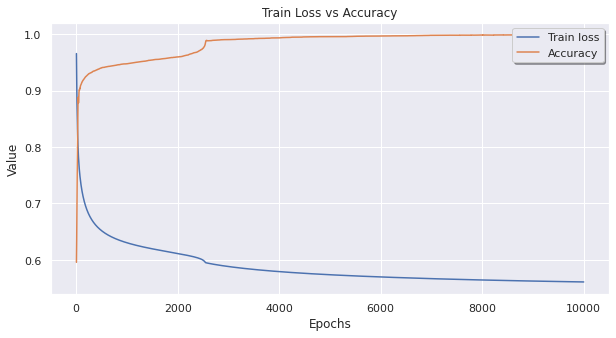

In [ ]:
model_rlg = MulticlassLogisticRegression(inputs_rlg.shape[1], len(np.unique(targets_rlg)))
optimizer = torch.optim.Adam(model_rlg.parameters(), lr=0.09)
cost = torch.nn.CrossEntropyLoss()
# se entrena el modelo
train(num_epochs=10000, optimizer=optimizer, cost=cost, model=model_rlg)

**Modelo predictivo de regresión logística del ROA**
- El modelo se define en la clase MulticlassLogisticRegression, que hereda de la clase torch.nn.Module de PyTorch. 
- El modelo tiene dos capas: una capa lineal y una capa de softmax:
  - La capa lineal se utiliza para realizar una operación de multiplicación matricial entre los datos de entrada (X) y los pesos (w) del modelo, más un sesgo (b). 
  - La capa de softmax se utiliza para calcular las probabilidades para cada clase en función de los valores de la capa lineal.

**Parametros**

- El modelo se entrena utilizando el optimizador Adam
- Con un learning rate de 0.09
- Se utiliza la función de costo de entropía cruzada (CrossEntropyLoss) para evaluar el rendimiento del modelo en cada iteración del entrenamiento. 
- El modelo se entrena durante 10000 épocas, y en cada época se actualizan los pesos y el sesgo del modelo mediante el optimizador Adam. 
- El método train es el encargado de entrenar al modelo, se le pasan los parametros necesarios para el entrenamiento.

## **Predicciones**

### **Predicciones con el modelo de regresión lineal ROE**

#### **Predicciones con el modelo de regresión lineal ROE - Categoria**

In [ ]:
def categoria():
  files_joined = os.path.join('/content/drive/MyDrive/Inteligencia Artificial/Segundo Parcial/Proyecto', "indicadores*xlsx")
  list_files = glob.glob(files_joined)
  dfp = pd.concat(map(pd.read_excel, list_files), ignore_index=True)
  # Remover Outliers
  dfp = dfp[(dfp['ROE'] > -1) & (dfp['ROE'] < 1) & (dfp['ROA'] > -1) & (dfp['ROA'] < 1) & (dfp['ENDEUDAMIENTO DEL ACTIVO'] < 6) & (dfp['RENTABILIDAD NETA DE VENTAS'] > -50) &
            (dfp['UTILIDAD OPERACIONAL/TOTAL DE ACTIVOS '] > -5) & (dfp['UTILIDAD OPERACIONAL/TOTAL DE ACTIVOS '] < 5) & (dfp['RENTABLIDAD FINANCIERA'] < 500)]
  # Creando Metricas
  metrics = {"Categoria": [], "MAE": [], "MSE": [], "RMSE": []}
  # Agrupar por RAMA
  dfp['DESCRIPCIÓN RAMA'].replace(desc, desc_good, inplace=True)
  grouped = dfp.groupby("DESCRIPCIÓN RAMA")
  # Declarar la figura y los axs
  fig, axs = plt.subplots(nrows=(len(grouped)//3)+1, ncols=3, figsize=(30,40))
  axs = axs.ravel()
  i = 0
  for name, group in grouped:
      inputs_rl = group[['RENTABILIDAD OPERACIONAL DEL PATRIMONIO', 'ENDEUDAMIENTO PATRIMONIAL', 'APALANCAMIENTO', 'FORTALEZA PATRIMONIAL']].values
      targets_rl = group[['ROE']].values
      # Escalando los datos
      scaler = StandardScaler()
      inputs = scaler.fit_transform(inputs_rl)
      # Transformando los datos a tensores
      inputs_rl = torch.from_numpy(inputs.astype(np.float32))
      targets_rl = torch.from_numpy(targets_rl.astype(np.float32))
      # Creando el conjunto de datos de test
      dataset_test = TensorDataset(inputs_rl, targets_rl)
      test_loader = DataLoader(dataset_test, batch_size=bs, shuffle=True)
      # Evaluando el modelo
      y_pred = []
      y_true = []
      model_rl.train(False)
      for inputs, targets in test_loader:
          y_pred.extend(model_rl(inputs).data.numpy())
          y_true.extend(targets.numpy())
      axs[i].scatter(y_pred, y_true)
      axs[i].set_title(f"{name}", fontsize=12, fontweight='bold')
      axs[i].set_ylabel('ROE')
      axs[i].set_xlabel('ROE (Predicciones)')
      axs[i].plot([-1,1], [-1, 1], '--k', c='r')
      i += 1
      # Calculando metricas
      mae = mean_absolute_error(y_true=y_true, y_pred=y_pred)
      mse = mean_squared_error(y_true=y_true, y_pred=y_pred, squared=True)
      rmse = mean_squared_error(y_true=y_true, y_pred=y_pred, squared=False)
      # Imprimiendo los resultados
      metrics["Categoria"].append(name)
      metrics["MAE"].append(mae)
      metrics["MSE"].append(mse)
      metrics["RMSE"].append(rmse)
  plt.show()
  metrics_df = pd.DataFrame(metrics)
  return metrics_df

<ipython-input-35-386a78ab7db8>:40: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--k" (-> color='k'). The keyword argument will take precedence.
  axs[i].plot([-1,1], [-1, 1], '--k', c='r')
<ipython-input-35-386a78ab7db8>:40: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--k" (-> color='k'). The keyword argument will take precedence.
  axs[i].plot([-1,1], [-1, 1], '--k', c='r')
<ipython-input-35-386a78ab7db8>:40: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--k" (-> color='k'). The keyword argument will take precedence.
  axs[i].plot([-1,1], [-1, 1], '--k', c='r')
<ipython-input-35-386a78ab7db8>:40: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--k" (-> color='k'). The keyword argument will take precedence.
  axs[i].plot([-1,1], [-1, 1], '--k', c='r')
<ipython-input-35-386a78ab7db8>:40: UserWarn

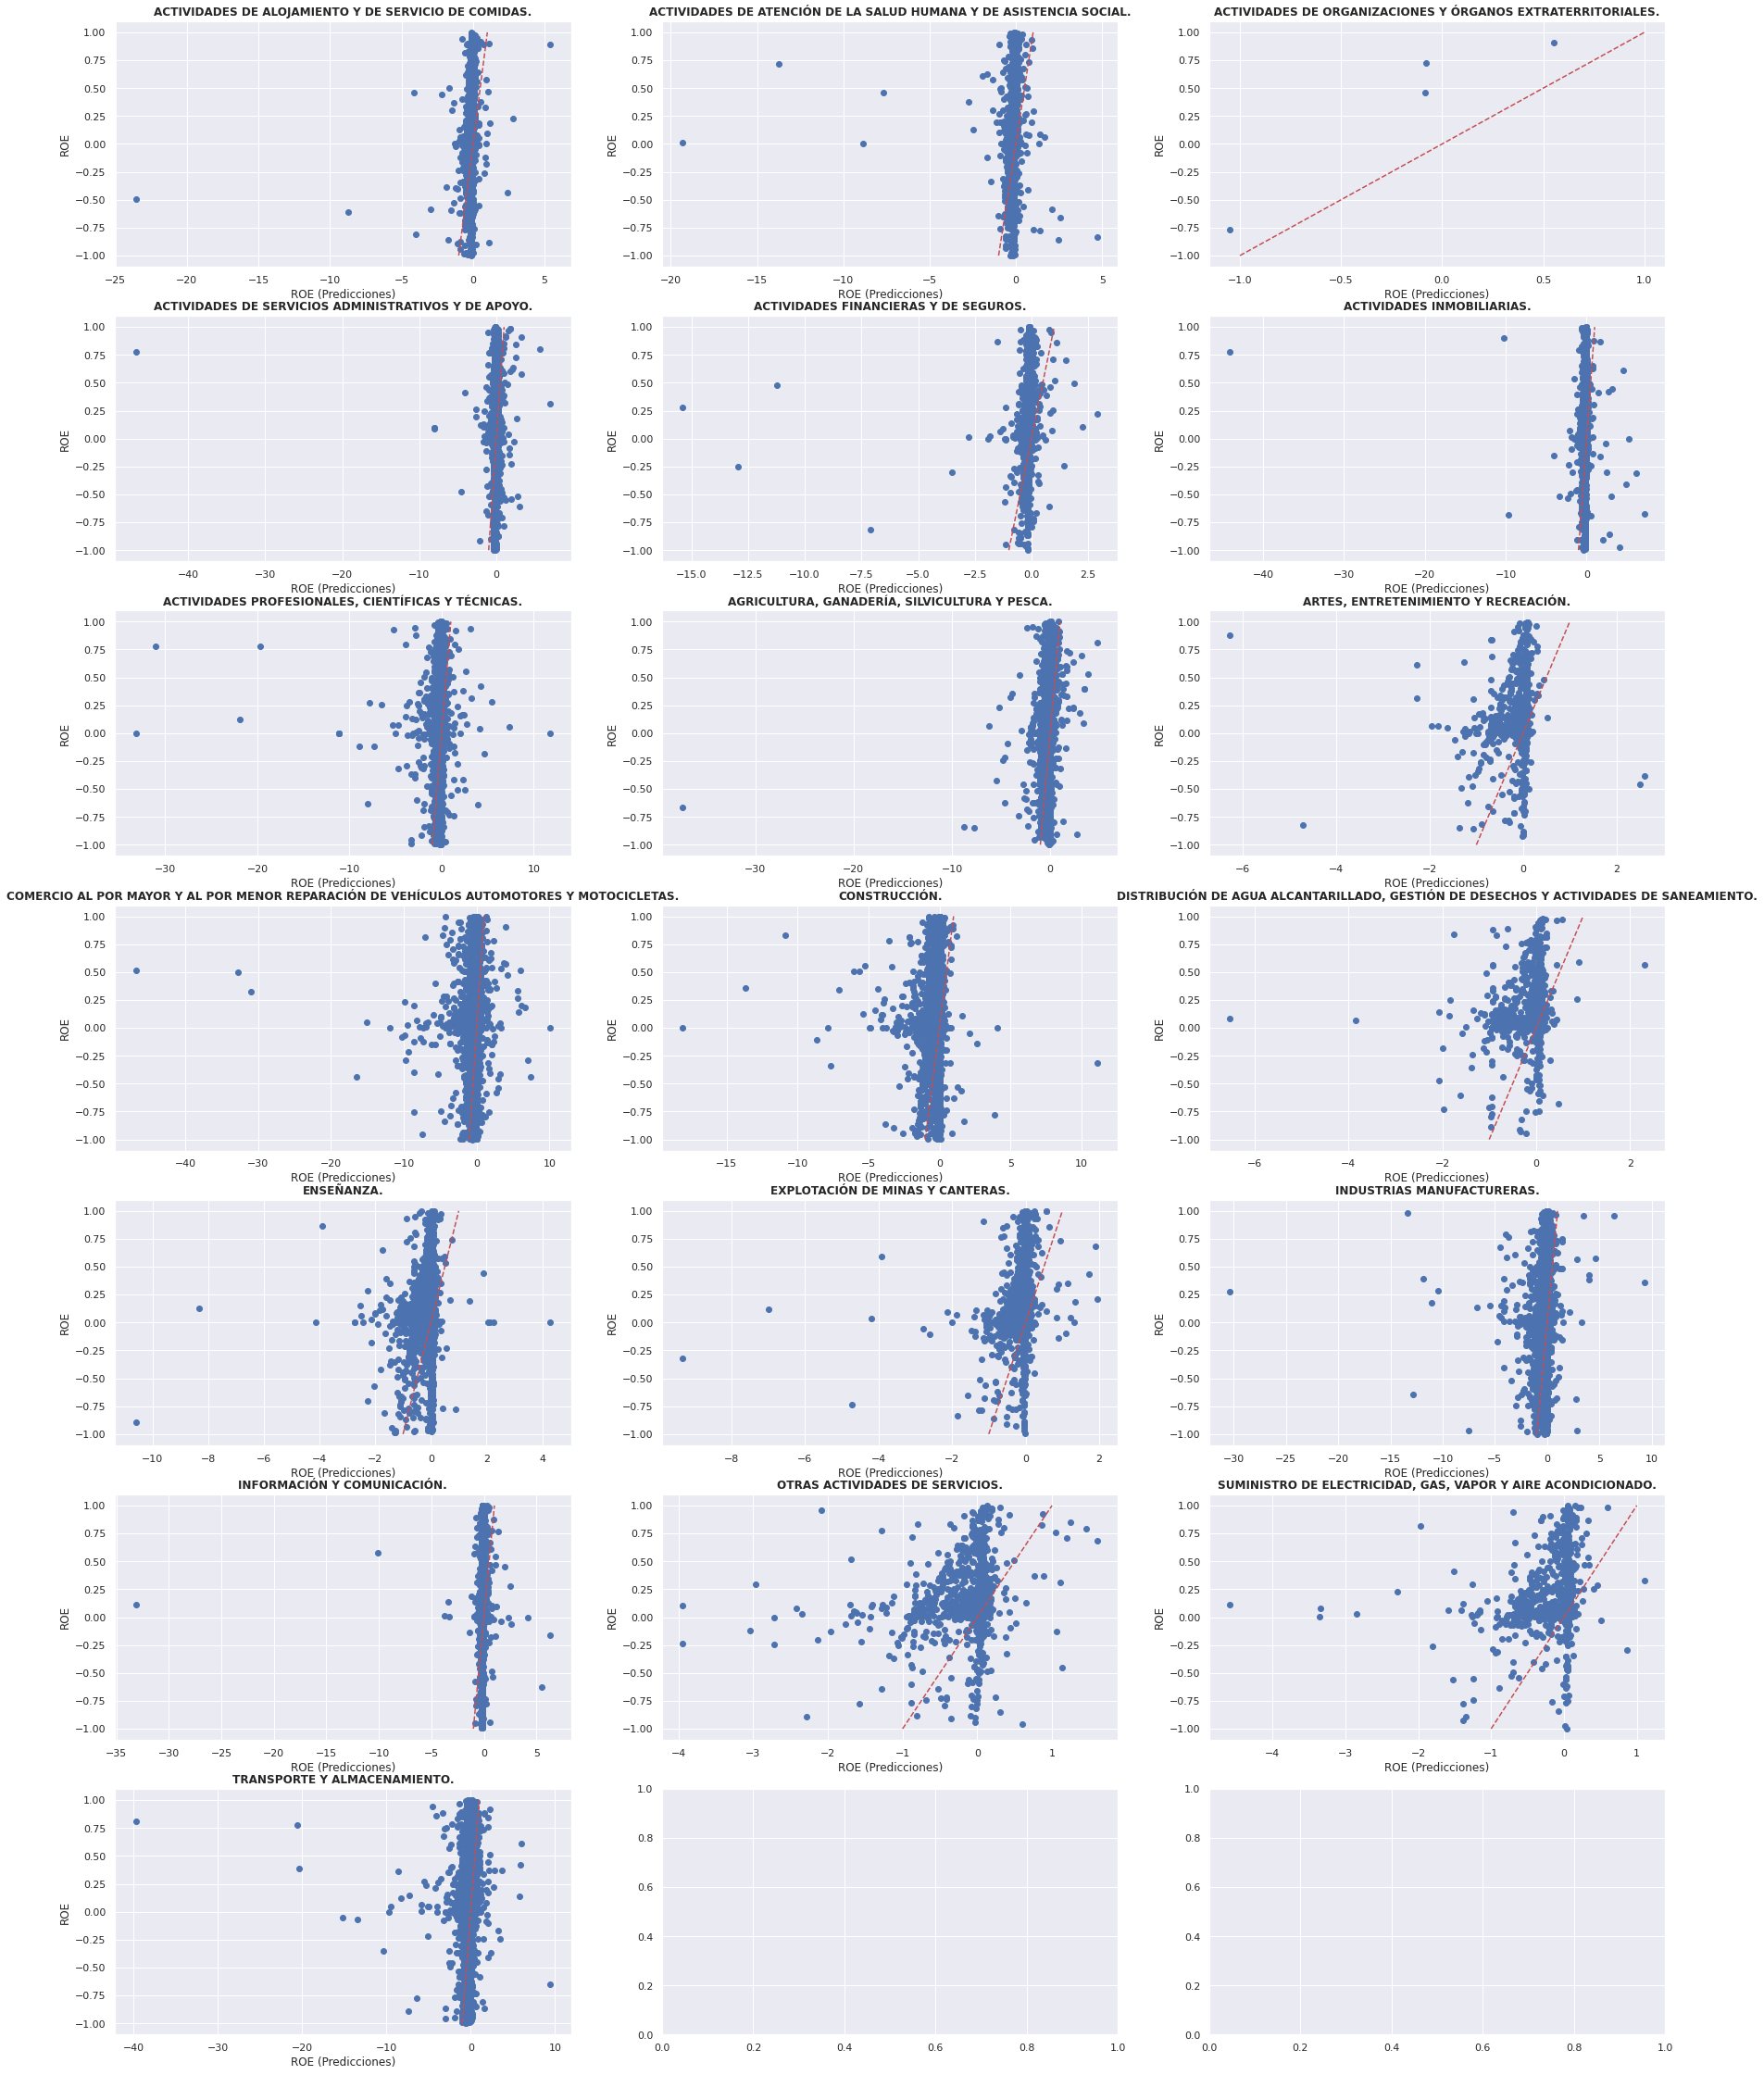

In [ ]:
metrics_rl = categoria()

In [ ]:
metrics_rl.sort_values("MAE", ascending=True)

,Categoria,MAE,MSE,RMSE
5,ACTIVIDADES INMOBILIARIAS.,0.285066,0.332005,0.576199
0,ACTIVIDADES DE ALOJAMIENTO Y DE SERVICIO DE CO...,0.338910,0.347971,0.589891
14,INDUSTRIAS MANUFACTURERAS.,0.340412,0.338397,0.581719
3,ACTIVIDADES DE SERVICIOS ADMINISTRATIVOS Y DE ...,0.346845,0.375671,0.612920
7,"AGRICULTURA, GANADERÍA, SILVICULTURA Y PESCA.",0.348913,0.341454,0.584341
9,COMERCIO AL POR MAYOR Y AL POR MENOR REPARACIÓ...,0.361293,0.373054,0.610781
18,TRANSPORTE Y ALMACENAMIENTO.,0.365589,0.369317,0.607714
13,EXPLOTACIÓN DE MINAS Y CANTERAS.,0.373172,0.341320,0.584226
10,CONSTRUCCIÓN.,0.374125,0.375671,0.612920
4,ACTIVIDADES FINANCIERAS Y DE SEGUROS.,0.378794,0.382037,0.618092


**Predicciones - Regresión Lineal**

- **Predicciones con el modelo de regresión lineal ROE - Categoria**

De las categorias que tienen menor error por lo tanto tiene un mejor rendimiento a la hora de predecir los ROE son:

Num | Categoria                                                 | MAE  | MSE  | RMSE
--- | ------------------------------------------------------------------- | ---- | ---- | ----
5   | ACTIVIDADES INMOBILIARIAS.                                    | 0.297 | 0.21 | 0.458
3   | ACTIVIDADES DE SERVICIOS ADMINISTRATIVOS Y DE APOYO | 0.353 | 0.264 | 0.514
0   | ACTIVIDADES DE ALOJAMIENTO Y DE SERVICIO DE CO... | 0.361 | 0.286 | 0.535

De las categorias que tienen menor error por lo tanto tiene un mayor rendimiento a la hora de predecir los ROE son:

Num | Categoria                                                 | MAE  | MSE  | RMSE
--- | ------------------------------------------------------------------- | ---- | ---- | ----
17  | SUMINISTRO DE ELECTRICIDAD, GAS, VAPOR Y AIRE ACONDICIONADO | 0.476 | 0.351 | 0.592
16  | OTRAS ACTIVIDADES DE SERVICIOS.                             | 0.485 | 0.342 | 0.584
2   | ACTIVIDADES DE ORGANIZACIONES Y Ã“RGANOS EXTRA... | 1.013 | 1.126 | 1.061

> **Nota:** Estos datos son de los años: 2017, 2018, 2019 y 2020 juntos

#### **Predicciones con el modelo de regresión lineal ROE - Año**

In [ ]:
def procesar_rl(año):
    df = pd.read_excel(f'/content/drive/MyDrive/Inteligencia Artificial/Segundo Parcial/Proyecto/indicadores{año}_cia.xlsx')
    print('Antes: ',len(df), ' ', año)
    # Remover Outliers
    df = df[(df['ROE'] > -1) & (df['ROE'] < 1) & (df['ROA'] > -1) & (df['ROA'] < 1) & (df['ENDEUDAMIENTO DEL ACTIVO'] < 6) & (df['RENTABILIDAD NETA DE VENTAS'] > -50) &
            (df['UTILIDAD OPERACIONAL/TOTAL DE ACTIVOS '] > -5) & (df['UTILIDAD OPERACIONAL/TOTAL DE ACTIVOS '] < 5) & (df['RENTABLIDAD FINANCIERA'] < 500)]
    # Input y Targets
    inputs_rl = df[['RENTABILIDAD OPERACIONAL DEL PATRIMONIO', 'ENDEUDAMIENTO PATRIMONIAL', 'APALANCAMIENTO', 'FORTALEZA PATRIMONIAL']].values
    targets_rl = df[['ROE']].values
    print('Despues: ',len(df), ' ', año)
    # Escalando los datos
    scaler = StandardScaler()
    inputs = scaler.fit_transform(inputs_rl)
    # Transformando los datos a tensores
    inputs_rl = torch.from_numpy(inputs.astype(np.float32))
    targets_rl = torch.from_numpy(targets_rl.astype(np.float32))
    # Creando el conjunto de datos de test
    dataset_test = TensorDataset(inputs_rl, targets_rl)
    test_loader = DataLoader(dataset_test, batch_size=bs, shuffle=True)
    # Evaluando el modelo
    y_pred = []
    y_true = []
    model_rl.train(False)
    for inputs, targets in test_loader:
        y_pred.extend(model_rl(inputs).data.numpy())
        y_true.extend(targets.numpy())
    plt.figure(figsize=(10, 5))
    plt.scatter(y_pred, y_true)
    plt.ylabel('ROE')
    plt.xlabel('ROE (Predicciones)')
    plt.plot([-1,1], [-1, 1], '--k', c='r')
    plt.show()
    # Calculando metricas
    mae = mean_absolute_error(y_true=y_true, y_pred=y_pred)
    mse = mean_squared_error(y_true=y_true, y_pred=y_pred, squared=True)
    rmse = mean_squared_error(y_true=y_true, y_pred=y_pred, squared=False)
    # Imprimiendo los resultados
    print(f"\nResultados para el año {año} - con {len(targets_rl)} datos:")
    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")

Antes:  81485   2017
Despues:  46592   2017


<ipython-input-38-878c63fd292f>:31: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--k" (-> color='k'). The keyword argument will take precedence.
  plt.plot([-1,1], [-1, 1], '--k', c='r')


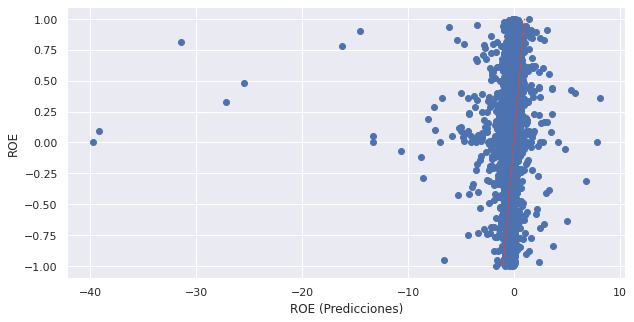


Resultados para el año 2017 - con 46592 datos:
MAE: 0.370351642370224
MSE: 0.38359636068344116
RMSE: 0.6193515658378601
Antes:  84232   2018
Despues:  48087   2018


<ipython-input-38-878c63fd292f>:31: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--k" (-> color='k'). The keyword argument will take precedence.
  plt.plot([-1,1], [-1, 1], '--k', c='r')


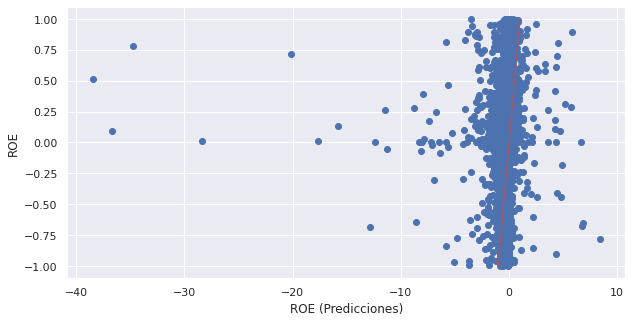


Resultados para el año 2018 - con 48087 datos:
MAE: 0.3676683306694031
MSE: 0.38143661618232727
RMSE: 0.6176055669784546
Antes:  85793   2019
Despues:  48657   2019


<ipython-input-38-878c63fd292f>:31: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--k" (-> color='k'). The keyword argument will take precedence.
  plt.plot([-1,1], [-1, 1], '--k', c='r')


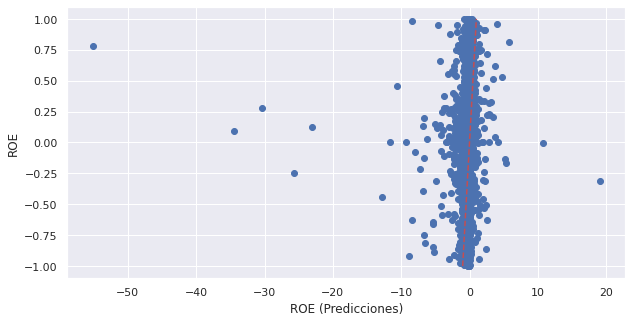


Resultados para el año 2019 - con 48657 datos:
MAE: 0.3509387969970703
MSE: 0.3705187737941742
RMSE: 0.608702540397644
Antes:  84470   2020
Despues:  45551   2020


<ipython-input-38-878c63fd292f>:31: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--k" (-> color='k'). The keyword argument will take precedence.
  plt.plot([-1,1], [-1, 1], '--k', c='r')


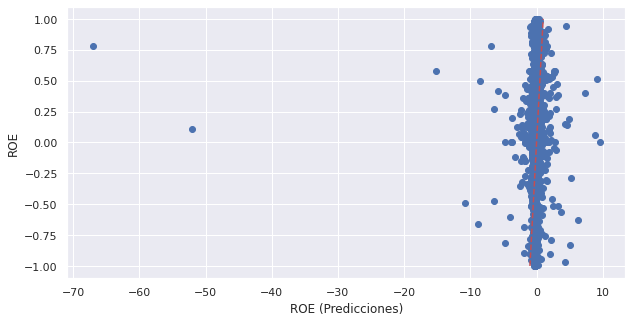


Resultados para el año 2020 - con 45551 datos:
MAE: 0.3453821539878845
MSE: 0.3734374940395355
RMSE: 0.6110953092575073


In [ ]:
#Arreglo años
years = [2017, 2018, 2019, 2020]

#Bucle para ejecutar proceso para cada año
for year in years:
    procesar_rl(year)

**Predicciones - Regresión Lineal**
- **Predicciones con el modelo de regresión lineal ROE - Año**

En los Años se evaluaron 3: Año 2017, 2018 y 2020

Resultados para los años 2017, 2018 y 2020:

| Año | MAE | MSE  | RMSE |
| --- | --- | ---  | ---  |
| 2020| 0.26601243019104004| 0.1771623194217682| 0.42090654373168945|
| 2018| 0.2776103615760803| 0.1740521788597107| 0.4171956181526184|
| 2017| 0.2798231244087219| 0.17468659579753876| 0.4179552495479584|

> Dando con el menor error al año 2020 con 26% de error

### **Predicciones con el modelo de regresión lógistica ROA**

#### **Predicciones con el modelo de regresión lógistica ROA - Categoria**

In [ ]:
def categoria_rlg():
  files_joined = os.path.join('/content/drive/MyDrive/Inteligencia Artificial/Segundo Parcial/Proyecto', "indicadores*xlsx")
  list_files = glob.glob(files_joined)
  dfp = pd.concat(map(pd.read_excel, list_files), ignore_index=True)
  # Remover Outliers
  dfp = dfp[(dfp['ROE'] > -1) & (dfp['ROE'] < 1) & (dfp['ROA'] > -1) & (dfp['ROA'] < 1) & (dfp['ENDEUDAMIENTO DEL ACTIVO'] < 6) & (dfp['RENTABILIDAD NETA DE VENTAS'] > -50) &
            (dfp['UTILIDAD OPERACIONAL/TOTAL DE ACTIVOS '] > -5) & (dfp['UTILIDAD OPERACIONAL/TOTAL DE ACTIVOS '] < 5) & (dfp['RENTABLIDAD FINANCIERA'] < 500)]

  dfp['ROA_DIS'] = pd.qcut(dfp['ROA'], 3, labels=False)
  #dfp["DESCRIPCIÓN RAMA"] = dfp[["DESCRIPCIÓN RAMA"]].values
  metrics = {"Categoria": [], "MAE": [], "MSE": [], "RMSE": [], "ACC": []}
  dfp['DESCRIPCIÓN RAMA'].replace(desc, desc_good, inplace=True)
  grouped = dfp.groupby("DESCRIPCIÓN RAMA")
  for name, group in grouped:
      inputs_rlg = group[['RENTABILIDAD NETA DEL ACTIVO',  'UTILIDAD OPERACIONAL/TOTAL DE ACTIVOS ', 'RENTABLIDAD FINANCIERA', 'RENTABILIDAD NETA DE VENTAS']].values
      targets_rlg = group[['ROA_DIS']].values
      # Escalando los datos
      scaler = StandardScaler()
      inputs = scaler.fit_transform(inputs_rlg)
      # Transformando los datos a tensores
      inputs_rlg = torch.from_numpy(inputs.astype(np.float32))
      targets_rlg = torch.from_numpy(targets_rlg.astype(np.int64))
      # Creando el conjunto de datos de test
      dataset_test = TensorDataset(inputs_rlg, targets_rlg)
      test_loader = DataLoader(dataset_test, batch_size=bs, shuffle=True)
      # Evaluando el modelo
      y_pred = []
      y_true = []
      model_rlg.train(False)
      for inputs, targets in test_loader:
        y_hat_test = model_rlg(inputs).data.numpy()
        y_hat_class = np.argmax(y_hat_test, axis=1)
        y_pred.extend(y_hat_class)
        y_true.extend(targets.numpy())
      # Calculando metricas
      mae = mean_absolute_error(y_true=y_true, y_pred=y_pred)
      mse = mean_squared_error(y_true=y_true, y_pred=y_pred, squared=True)
      rmse = mean_squared_error(y_true=y_true, y_pred=y_pred, squared=False)
      acc = accuracy_score(y_true, y_pred)
      # Imprimiendo los resultados
      metrics["Categoria"].append(name)
      metrics["MAE"].append(mae)
      metrics["MSE"].append(mse)
      metrics["RMSE"].append(rmse)
      metrics["ACC"].append(acc)
          
  metrics_df_ = pd.DataFrame(metrics)
  return metrics_df_

In [ ]:
metrics_rlg = categoria_rlg()

In [ ]:
metrics_rlg.sort_values("ACC", ascending=False)

,Categoria,MAE,MSE,RMSE,ACC
9,COMERCIO AL POR MAYOR Y AL POR MENOR REPARACIÓ...,0.018897,0.018897,0.137465,0.981103
7,"AGRICULTURA, GANADERÍA, SILVICULTURA Y PESCA.",0.027671,0.027671,0.166345,0.972329
12,ENSEÑANZA.,0.086347,0.086347,0.293848,0.913653
5,ACTIVIDADES INMOBILIARIAS.,0.113358,0.113358,0.336687,0.886642
14,INDUSTRIAS MANUFACTURERAS.,0.122979,0.122979,0.350683,0.877021
3,ACTIVIDADES DE SERVICIOS ADMINISTRATIVOS Y DE ...,0.127546,0.127546,0.357136,0.872454
13,EXPLOTACIÓN DE MINAS Y CANTERAS.,0.135818,0.135818,0.368535,0.864182
16,OTRAS ACTIVIDADES DE SERVICIOS.,0.210479,0.210479,0.458780,0.789521
15,INFORMACIÓN Y COMUNICACIÓN.,0.212956,0.212956,0.461472,0.787044
11,"DISTRIBUCIÓN DE AGUA ALCANTARILLADO, GESTIÓN D...",0.215844,0.215844,0.464590,0.784156


**Predicciones - Regresión Logistica**

- **Predicciones con el modelo de regresión Logistica ROA - Categoria**

Los 3 grupos con mayor Acc son:

Num | Categoria                                                                 | MAE    | MSE    | RMSE    | ACC
--- | --- | ------ | ------ | ------- | ---
9   | COMERCIO AL POR MAYOR Y AL POR MENOR REPARACIÓN DE VEHÍCULOS DE MOTOR Y MOTOCICLETAS. | 0.0189 | 0.0189 | 0.1375  | 0.981
7   | AGRICULTURA, GANADERÍA, SILVICULTURA Y PESCA. | 0.0277 | 0.0277 | 0.1663  | 0.972
12  | ENSEÑANZA.  | 0.0867 | 0.0867 | 0.2945  | 0.913


Los 3 grupos con menor Acc son:

Num | Categoria                                                                 | MAE    | MSE    | RMSE    | ACC
--- | -------------------------------------------------------------------------------------------- | ------ | ------ | ------- | ---
6   | ACTIVIDADES PROFESIONALES, CIENTÍFICAS Y TÉCNICAS. | 0.3149 | 0.3149 | 0.5612  | 0.685
0   | ACTIVIDADES DE ALOJAMIENTO Y DE SERVICIO DE COMIDAS. | 0.344  | 0.344  | 0.5869  | 0.656
2   | ACTIVIDADES DE ORGANIZACIONES Y ÓRGANOS EXTRATERRITORIALES.| 0.500   | 0.500    | 0.7071  | 0.500


- El modelo tiene un mejor rendimiento en la predicción de las categorías, ya que tienen una mayor precisión (ACC más alta):
 - COMERCIO AL POR MAYOR Y AL POR MENOR REPARACIÓN DE VEHÍCULOS DE MOTOR Y MOTOCICLETAS.
 - AGRICULTURA, GANADERÍA, SILVICULTURA Y PESCA.
 - ENSEÑANZA.

- El modelo tiene un rendimiento peor en la predicción de las categorías, ya que tienen una precisión más baja (ACC más baja):
 - ACTIVIDADES PROFESIONALES, CIENTÍFICAS Y TÉCNICAS.
 - ACTIVIDADES DE ALOJAMIENTO Y DE SERVICIO DE COMIDAS.
 - ACTIVIDADES DE ORGANIZACIONES Y ÓRGANOS EXTRATERRITORIALES.

#### **Predicciones con el modelo de regresión lógistica ROA - Año**

In [ ]:
def procesar_rlg(año):
    df = pd.read_excel(f'/content/drive/MyDrive/Inteligencia Artificial/Segundo Parcial/Proyecto/indicadores{año}_cia.xlsx')
    # Remover Outliers
    df = df[(df['ROE'] > -1) & (df['ROE'] < 1) & (df['ROA'] > -1) & (df['ROA'] < 1) & (df['ENDEUDAMIENTO DEL ACTIVO'] < 6) & (df['RENTABILIDAD NETA DE VENTAS'] > -50) &
            (df['UTILIDAD OPERACIONAL/TOTAL DE ACTIVOS '] > -5) & (df['UTILIDAD OPERACIONAL/TOTAL DE ACTIVOS '] < 5) & (df['RENTABLIDAD FINANCIERA'] < 500)]
    df['ROA_DIS'] = pd.qcut(df['ROA'], 3, labels=False)
    # Input y Targets
    inputs_rlg = df[['RENTABILIDAD NETA DEL ACTIVO',  'UTILIDAD OPERACIONAL/TOTAL DE ACTIVOS ', 'RENTABLIDAD FINANCIERA', 'RENTABILIDAD NETA DE VENTAS']].values
    targets_rlg = df[['ROA_DIS']].values
    # Escalando los datos
    scaler = StandardScaler()
    inputs = scaler.fit_transform(inputs_rlg)
    # Transformando los datos a tensores
    inputs_rlg = torch.from_numpy(inputs.astype(np.float32))
    targets_rlg = torch.from_numpy(targets_rlg.astype(np.int64))
    # Creando el conjunto de datos de test
    dataset_test = TensorDataset(inputs_rlg, targets_rlg)
    test_loader = DataLoader(dataset_test, batch_size=bs, shuffle=True)
    # Evaluando el modelo
    y_pred = []
    y_true = []
    model_rlg.train(False)
    for inputs, targets in test_loader:
        y_hat_test = model_rlg(inputs).data.numpy()
        y_hat_class = np.argmax(y_hat_test, axis=1)
        y_pred.extend(y_hat_class)
        y_true.extend(targets.numpy())
    # Calculando metricas
    mae = mean_absolute_error(y_true=y_true, y_pred=y_pred)
    mse = mean_squared_error(y_true=y_true, y_pred=y_pred, squared=True)
    rmse = mean_squared_error(y_true=y_true, y_pred=y_pred, squared=False)
    acc = accuracy_score(y_true, y_pred)

    # Imprimiendo los resultados
    print(f"\nResultados para el año {año} - con {len(targets_rlg)} datos:")
    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    print('Accuracy: {:.2f}%'.format(acc*100))

In [ ]:
#Arreglo años
years = [2017, 2018, 2019, 2020]

#Bucle para ejecutar proceso para cada año
for year in years:
    procesar_rlg(year)


Resultados para el año 2017 - con 46592 datos:
MAE: 0.14139766483516483
MSE: 0.14139766483516483
RMSE: 0.3760288085175986
Accuracy: 85.86%

Resultados para el año 2018 - con 48087 datos:
MAE: 0.1453615322228461
MSE: 0.1453615322228461
RMSE: 0.38126307482215754
Accuracy: 85.46%

Resultados para el año 2019 - con 48657 datos:
MAE: 0.1268676654952011
MSE: 0.1268676654952011
RMSE: 0.35618487544420113
Accuracy: 87.31%

Resultados para el año 2020 - con 45551 datos:
MAE: 0.07721016004039429
MSE: 0.07721016004039429
RMSE: 0.27786716258024136
Accuracy: 92.28%


**Predicciones - Regresión Logistica**

- **Predicciones con el modelo de regresión Logistica ROA - Año**

- A partir de los datos presentados en la tabla, se puede concluir:
El modelo tuvo un mejor rendimiento en el año 2020 en comparación con los años 2017 y 2018. Esto se refleja en un MAE, MSE y RMSE más bajos y en un mayor porcentaje de accuracy. 
- Esto sugiere que el modelo tuvo un mejor desempeño en la predicción de los datos del año 2020 en comparación con los datos de los años 2017 y 2018.

| Año   | Nº de Datos | MAE | MSE  | RMSE | Accuracy (%) |
| ----- | ----------- | --- | ---- | ---- | ------------ |
| 2020  | 45551       | 0.0769686724770038| 0.0769686724770038| 0.27743228448939355| 92.30 |
| 2018  | 48087       | 0.1453407365816125| 0.1453407365816125| 0.38123580180986744| 85.47 |
| 2017  | 46592       | 0.14144059065934067| 0.14144059065934067| 0.3760858820260881| 85.86 |

## **Conclusiones preeliminares - Técnicas**

**Análisis Predictivo mediante el modelo de regresión lineal - regresión logística para evaluar el ROE/ROA en las empresas del Ecuador durante los años 2017-2020**

**Pregunta 1: ¿Qué año predice mejor y peor los modelos creado?** 
-  Se podría concluir con certeza que el modelo de regresión logística tiene un mejor desempeño en la predicción de los datos del año 2020 en comparación con los años 2017 y 2018. 
- Esto podría deberse a que el modelo de regresión logística es mejor para manejar problemas de clasificación y los datos del año 2020 presentaban una distribución de clases diferente o más compleja que los datos de los años 2017 y 2018.
- Por otro lado, el modelo de regresión lineal tendría un desempeño similar en las predicciones para los años 2017, 2018 y 2020, ya que es un modelo diseñado para manejar problemas de regresión y los datos no presentan una gran variación en su distribución.

**Pregunta 2: ¿Qué categoría de empresas predice mejor y peor los modelos creados?**

- Con base en los datos presentados, se puede concluir que el modelo de regresión lineal tiene un mejor rendimiento en la predicción de las categorías "ACTIVIDADES INMOBILIARIAS.", "ACTIVIDADES DE SERVICIOS ADMINISTRATIVOS Y DE APOYO" y "ACTIVIDADES DE ALOJAMIENTO Y DE SERVICIO DE COMIDAS.", ya que tienen un error menor en las medidas MAE, MSE y RMSE. Por otro lado, el modelo tiene un rendimiento peor en la predicción de las categorías  "SUMINISTRO DE ELECTRICIDAD, GAS, VAPOR Y AIRE ACONDICIONADO", "OTRAS ACTIVIDADES DE SERVICIOS." y "ACTIVIDADES DE ORGANIZACIONES Y ÓRGANOS EXTRATERRITORIALES.", ya que tienen un error mayor en las medidas MAE, MSE y RMSE.

- En cuanto al modelo de regresión logística, se observa que tiene un mejor rendimiento en la predicción de las categorías  "COMERCIO AL POR MAYOR Y AL POR MENOR REPARACIÓN DE VEHÍCULOS DE MOTOR Y MOTOCICLETAS.", "AGRICULTURA, GANADERÍA, SILVICULTURA Y PESCA." y "ENSEÑANZA.", ya que tienen una precisión más alta (ACC más alta). Por otro lado, el modelo tiene un rendimiento peor en la predicción de las categorías "ACTIVIDADES PROFESIONALES, CIENTÍFICAS Y TÉCNICAS.", "ACTIVIDADES DE ALOJAMIENTO Y DE SERVICIO DE COMIDAS." y "ACTIVIDADES DE ORGANIZACIONES Y ÓRGANOS EXTRATERRITORIALES.", ya que tienen una precisión más baja (ACC más baja).

**Resumen:** 

- Con respecto a los Años que se predice mejor el modelo de regresión lógistica todos los años predecidos

- La categoria que predicen mejor ambos modelos es: L - ACTIVIDADES INMOBILIARIAS.

- La peor en ambos fue la M y U: "ACTIVIDADES PROFESIONALES, CIENTÍFICAS Y TÉCNICAS" y "ACTIVIDADES DE ORGANIZACIONES Y ÓRGANOS EXTRATERRITORIALES.", puede deberse a la poca información que se prevee

<center><img src="https://course.elementsofai.com/static/banner-part-4-79abf648af706ddee0f26e519b6a22e0.svg"></center>

## **¿Y ahora que?**

- Para este punto se pretende dar una explicación en base a los datos obtenidos del porque las categorias tienen menor rendimiento, para esto se realiza un analisis Profundo de solo esas categoria con las variables de entradas y salidas
- Las categorias a Analizar son:
  - ACTIVIDADES PROFESIONALES, CIENTÍFICAS Y TÉCNICAS.
  - ACTIVIDADES DE ORGANIZACIONES Y ÓRGANOS EXTRATERRITORIALES.

## **Analisis Profundo**

### **ACTIVIDADES PROFESIONALES, CIENTÍFICAS Y TÉCNICAS.**

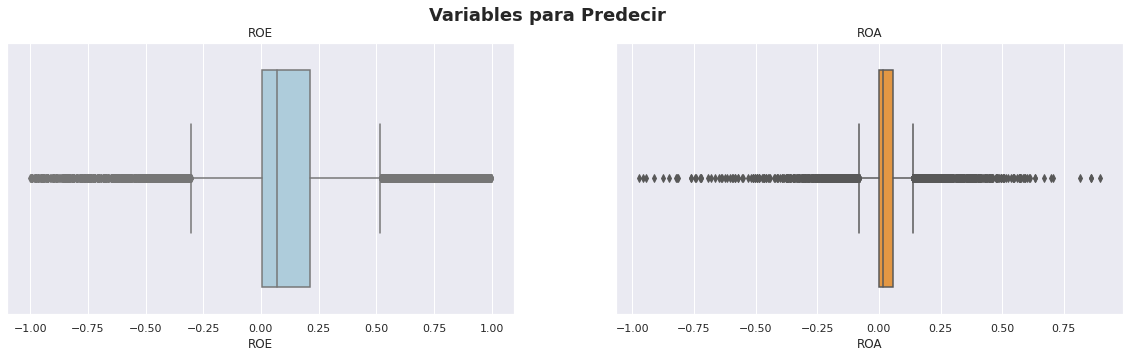

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,5))

sns.boxplot(x = df['ROE'], ax=ax1, palette="Paired")
sns.boxplot(x =  df['ROA'],ax=ax2, palette="YlOrBr")

fig.suptitle("Variables para Predecir", fontsize=18, fontweight='bold')
ax1.set_title("ROE")
ax2.set_title("ROA")
plt.show()

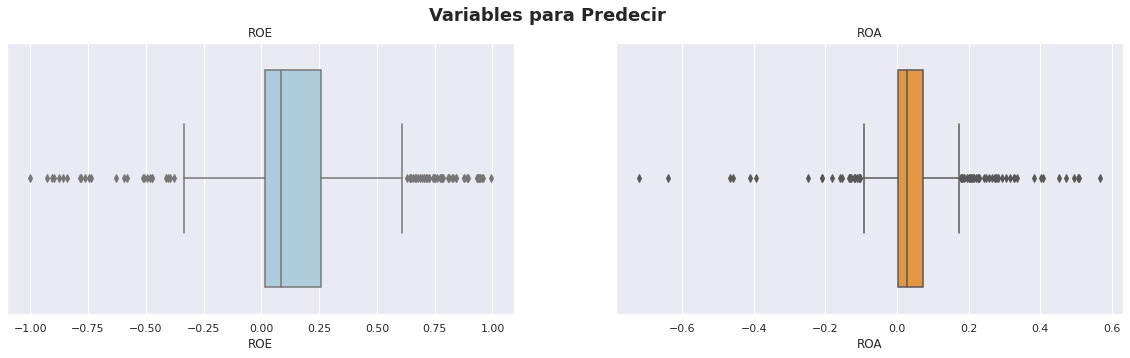

In [ ]:
df_pro = df[df['DESCRIPCIÓN RAMA']=='ACTIVIDADES PROFESIONALES, CIENTÍFICAS Y TÉCNICAS.']

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,5))

sns.boxplot(x = df_pro['ROE'], ax=ax1, palette="Paired")
sns.boxplot(x =  df_pro['ROA'],ax=ax2, palette="YlOrBr")

fig.suptitle("Variables para Predecir", fontsize=18, fontweight='bold')
ax1.set_title("ROE")
ax2.set_title("ROA")
plt.show()

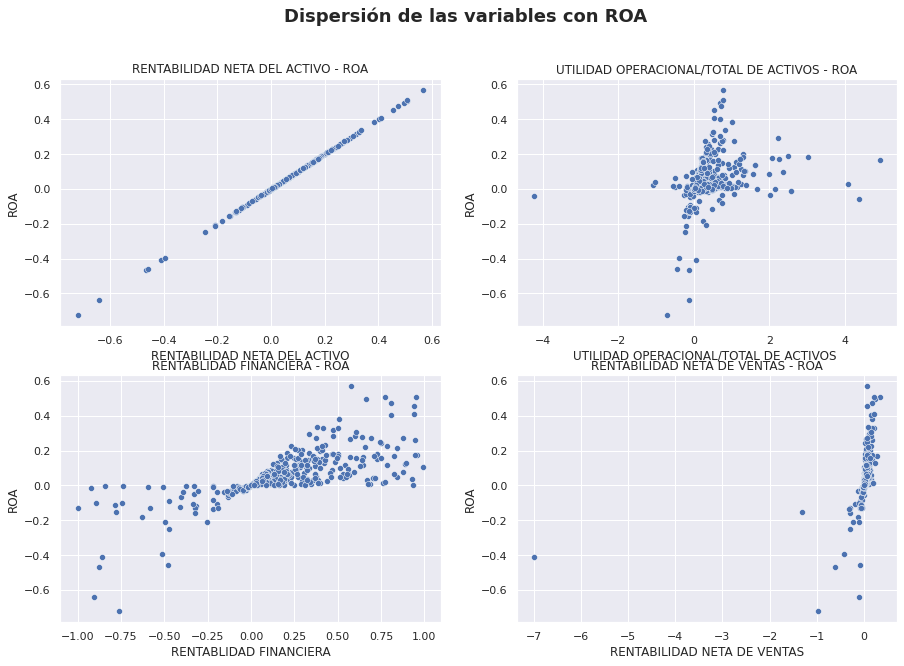

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(15,10))

sns.scatterplot(x = df_pro['RENTABILIDAD NETA DEL ACTIVO'],y = df['ROA'], ax=ax1)
sns.scatterplot(x = df_pro['UTILIDAD OPERACIONAL/TOTAL DE ACTIVOS '],y = df['ROA'], ax=ax2)
sns.scatterplot(x = df_pro['RENTABLIDAD FINANCIERA'],y = df['ROA'], ax=ax3)
sns.scatterplot(x = df_pro['RENTABILIDAD NETA DE VENTAS'],y = df['ROA'], ax=ax4)

fig.suptitle("Dispersión de las variables con ROA", fontsize=18, fontweight='bold')
ax1.set_title("RENTABILIDAD NETA DEL ACTIVO - ROA")
ax2.set_title("UTILIDAD OPERACIONAL/TOTAL DE ACTIVOS - ROA")
ax3.set_title("RENTABLIDAD FINANCIERA - ROA")
ax4.set_title("RENTABILIDAD NETA DE VENTAS - ROA")
plt.show()

### **ACTIVIDADES DE ORGANIZACIONES Y ÓRGANOS EXTRATERRITORIALES.**

- Para esta categoria se determina que los registros o datos de estas categorias son insuficientes para que la predicción sea correcta

## **Conclusiones Finales**

**Pregunta 1: ¿Qué año predice mejor y peor los modelos creado?**

- Los modelos de regresión lineal y logística fueron utilizados para predecir diferentes años y los resultados muestran que ambos modelos tuvieron un mejor desempeño en la predicción de los datos del año 2020.
- Además de tener el mismo rendimiento se en ambos modelos se da como definido que los datos estan en la misma página, es decir, no cambian en su totalidad


**Pregunta 2: ¿Qué categoría de empresas predice mejor y peor los modelos creados?**

Categorias que Predicen Mejor:
"COMERCIO AL POR MAYOR Y AL POR MENOR REPARACIÓN DE VEHÍCULOS DE MOTOR Y MOTOCICLETAS.", "ACTIVIDADES INMOBILIARIAS." y "ENSEÑANZA."


Categorias que Predicen Peor:

 - ACTIVIDADES PROFESIONALES, CIENTÍFICAS Y TÉCNICAS. - Por tener datos de entradas en con tendencia positiva, es decir, que en las variables escogidas, hay datos de entradas positivos con ROA y ROE negativos, por lo que se recomienda evaluar un modelo por separado, puede deberse a la recoleccion de datos, una mal limpieza de datos o incluso diferentes forma de obtener el ROA y ROE
 - ACTIVIDADES DE ORGANIZACIONES Y ÓRGANOS EXTRATERRITORIALES. - Por falta de datos

<center><img src="https://www.ionos.es/digitalguide/fileadmin/_processed_/5/4/csm_selection-bias-t_8238fc2d7e.jpg"></center>